In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fuel= pd.read_csv('fuel_ferc1.csv')

In [3]:
fuel.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [4]:
fuel.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [6]:
fuel.kurtosis()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [48]:
fuel.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

In [7]:
fuel.isnull().sum().sort_values(ascending=False)

fuel_unit                       180
fuel_cost_per_mmbtu               0
fuel_cost_per_unit_delivered      0
fuel_cost_per_unit_burned         0
fuel_mmbtu_per_unit               0
fuel_qty_burned                   0
fuel_type_code_pudl               0
plant_name_ferc1                  0
report_year                       0
utility_id_ferc1                  0
record_id                         0
dtype: int64

In [24]:
missing =fuel['fuel_unit'].isnull().sum()
missing

180

In [25]:
(missing/len(fuel['fuel_unit']))*100

0.609694136774718

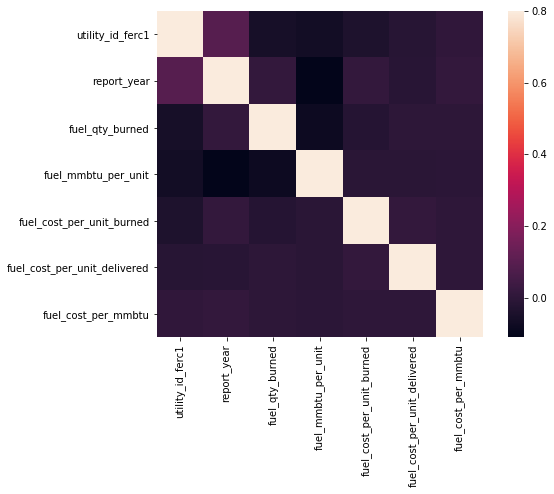

In [12]:
fuel_cost_corr = fuel.corr()
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(fuel_cost_corr, vmax=.8, square=True,);

In [13]:
corr=fuel.corr()
corr_top=corr['fuel_cost_per_unit_burned'].sort_values(ascending=False)[:10]
corr_top

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

In [14]:
fuel.corr().sort_values('fuel_cost_per_unit_burned', ascending=False)

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122


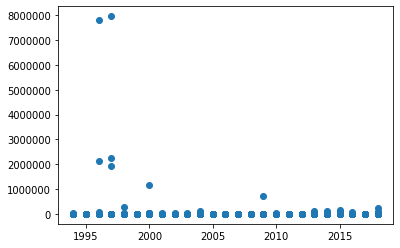

In [16]:
plt.scatter(x=fuel['report_year'],y=fuel['fuel_cost_per_unit_delivered'])

In [19]:
A = [1,2,3,4,5,6] 
B = [13, 21, 34]
A_B = A.append(B)

In [20]:
A

[1, 2, 3, 4, 5, 6, [13, 21, 34]]

In [33]:
cost= fuel.groupby(['report_year','fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

In [40]:
y1994,y1998= cost.loc[[1994,1998], 'coal']
P_change=((y1998-y1994)/y1994)*100
P_change

-20.56765451826049

In [32]:
fuel.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [42]:
year= fuel[fuel['report_year']>=1994]
mean=pd.pivot_table(year, values ='fuel_cost_per_unit_delivered', index='report_year')
mean.sort_values(by='fuel_cost_per_unit_delivered',axis=0, ascending=False)

,fuel_cost_per_unit_delivered
report_year,
1997,11140.197239
1996,9196.705948
2000,985.362877
2009,652.694163
2018,499.269966
2015,326.535511
1998,287.154420
2014,192.737183
2013,172.307591
